[View in Colaboratory](https://colab.research.google.com/github/pskshyam/RNN/blob/master/StockPricePrediction_CNN_StackedLSTM.ipynb)

In [0]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load Dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv
User uploaded file "Google_Stock_Price_Test.csv" with length 1029 bytes
User uploaded file "Google_Stock_Price_Train.csv" with length 63488 bytes


In [0]:
#Read Training Dataset
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values #Take only Date and Open columns as array

In [10]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [11]:
training_set[0:10]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04],
       [313.7 ],
       [310.59],
       [314.43],
       [311.96],
       [314.81]])

In [12]:
#Apply Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled[0:10]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259]])

In [18]:
#Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train) #convert lists to arrays
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [15]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [21]:
#Reshaping - adding new dimension
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

**Building the RNN - Stacked LSTM**

In [22]:
#Import Keras Libraries and Packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [0]:
#Initialize the RNN
regressor = Sequential()

In [0]:
#Adding first LSTM Layer and Dropout regularization
regressor.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [0]:
#Adding second LSTM Layer and Dropout regularization
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
#Adding third LSTM Layer and Dropout regularization
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
#Adding fourth LSTM Layer and Dropout regularization
regressor.add(LSTM(50))
regressor.add(Dropout(0.2))

In [0]:
#Adding output layer
regressor.add(Dense(1))

In [0]:
#Compiling the model
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [31]:
#Fitting the model to training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 2)

Epoch 1/100
 - 19s - loss: 0.0480
Epoch 2/100
 - 19s - loss: 0.0068
Epoch 3/100
 - 19s - loss: 0.0056
Epoch 4/100
 - 19s - loss: 0.0050
Epoch 5/100
 - 19s - loss: 0.0052
Epoch 6/100
 - 19s - loss: 0.0050
Epoch 7/100
 - 19s - loss: 0.0044
Epoch 8/100
 - 19s - loss: 0.0049
Epoch 9/100
 - 19s - loss: 0.0043
Epoch 10/100
 - 19s - loss: 0.0043
Epoch 11/100
 - 19s - loss: 0.0039
Epoch 12/100
 - 19s - loss: 0.0039
Epoch 13/100
 - 19s - loss: 0.0038
Epoch 14/100
 - 19s - loss: 0.0039
Epoch 15/100
 - 19s - loss: 0.0040
Epoch 16/100
 - 19s - loss: 0.0040
Epoch 17/100
 - 19s - loss: 0.0036
Epoch 18/100
 - 19s - loss: 0.0035
Epoch 19/100
 - 19s - loss: 0.0037
Epoch 20/100
 - 19s - loss: 0.0035
Epoch 21/100
 - 19s - loss: 0.0035
Epoch 22/100
 - 19s - loss: 0.0034
Epoch 23/100
 - 19s - loss: 0.0032
Epoch 24/100
 - 19s - loss: 0.0037
Epoch 25/100
 - 19s - loss: 0.0036
Epoch 26/100
 - 19s - loss: 0.0031
Epoch 27/100
 - 19s - loss: 0.0030
Epoch 28/100
 - 19s - loss: 0.0027
Epoch 29/100
 - 19s - loss: 0

 - 19s - loss: 0.0022
Epoch 55/100
 - 19s - loss: 0.0021
Epoch 56/100
 - 19s - loss: 0.0021
Epoch 57/100
 - 19s - loss: 0.0020
Epoch 58/100
 - 19s - loss: 0.0021
Epoch 59/100
 - 19s - loss: 0.0024
Epoch 60/100
 - 19s - loss: 0.0020
Epoch 61/100
 - 19s - loss: 0.0023
Epoch 62/100
 - 19s - loss: 0.0020
Epoch 63/100
 - 19s - loss: 0.0020
Epoch 64/100
 - 19s - loss: 0.0018
Epoch 65/100
 - 19s - loss: 0.0019
Epoch 66/100
 - 19s - loss: 0.0018
Epoch 67/100
 - 19s - loss: 0.0020
Epoch 68/100
 - 19s - loss: 0.0022
Epoch 69/100
 - 19s - loss: 0.0017
Epoch 70/100
 - 19s - loss: 0.0019
Epoch 71/100
 - 19s - loss: 0.0017
Epoch 72/100
 - 19s - loss: 0.0022
Epoch 73/100
 - 19s - loss: 0.0019
Epoch 74/100
 - 19s - loss: 0.0019
Epoch 75/100
 - 19s - loss: 0.0016
Epoch 76/100
 - 19s - loss: 0.0019
Epoch 77/100
 - 19s - loss: 0.0017
Epoch 78/100
 - 19s - loss: 0.0019
Epoch 79/100
 - 19s - loss: 0.0019
Epoch 80/100
 - 19s - loss: 0.0017
Epoch 81/100
 - 19s - loss: 0.0016
Epoch 82/100
 - 19s - loss: 0.002

**Making Predictions**

In [0]:
#Get the real stock price of Jan 2017 by reading Test Dataset
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values #Take only Date and Open columns as array

In [0]:
#Get the predicted stock price of Jan 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1) #Gives numpy array
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80): #60 previous timesteps + 20 january timesteps
  X_test.append(inputs[i-60:i, 0])  
X_test = np.array(X_test) #convert lists to arrays
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [37]:
predicted_stock_price

array([[797.94916],
       [795.06006],
       [794.7546 ],
       [796.1134 ],
       [799.7007 ],
       [806.0056 ],
       [812.3168 ],
       [815.56067],
       [816.16736],
       [815.4535 ],
       [814.4856 ],
       [813.67175],
       [813.20703],
       [813.61285],
       [814.65753],
       [819.12384],
       [826.37823],
       [834.67523],
       [839.97015],
       [836.9269 ]], dtype=float32)

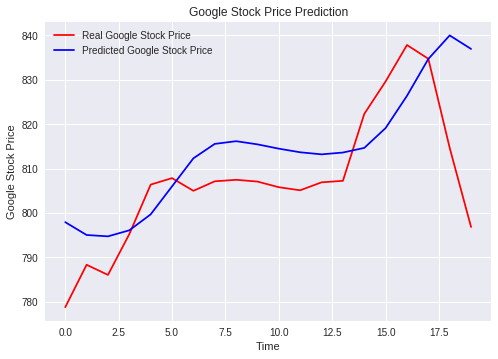

In [38]:
#Visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()